In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

plt.style.use("classic")

In [79]:
import os
import tarfile
import urllib

#1 데이터 다운로드
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_Data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) :
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [80]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [81]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [84]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


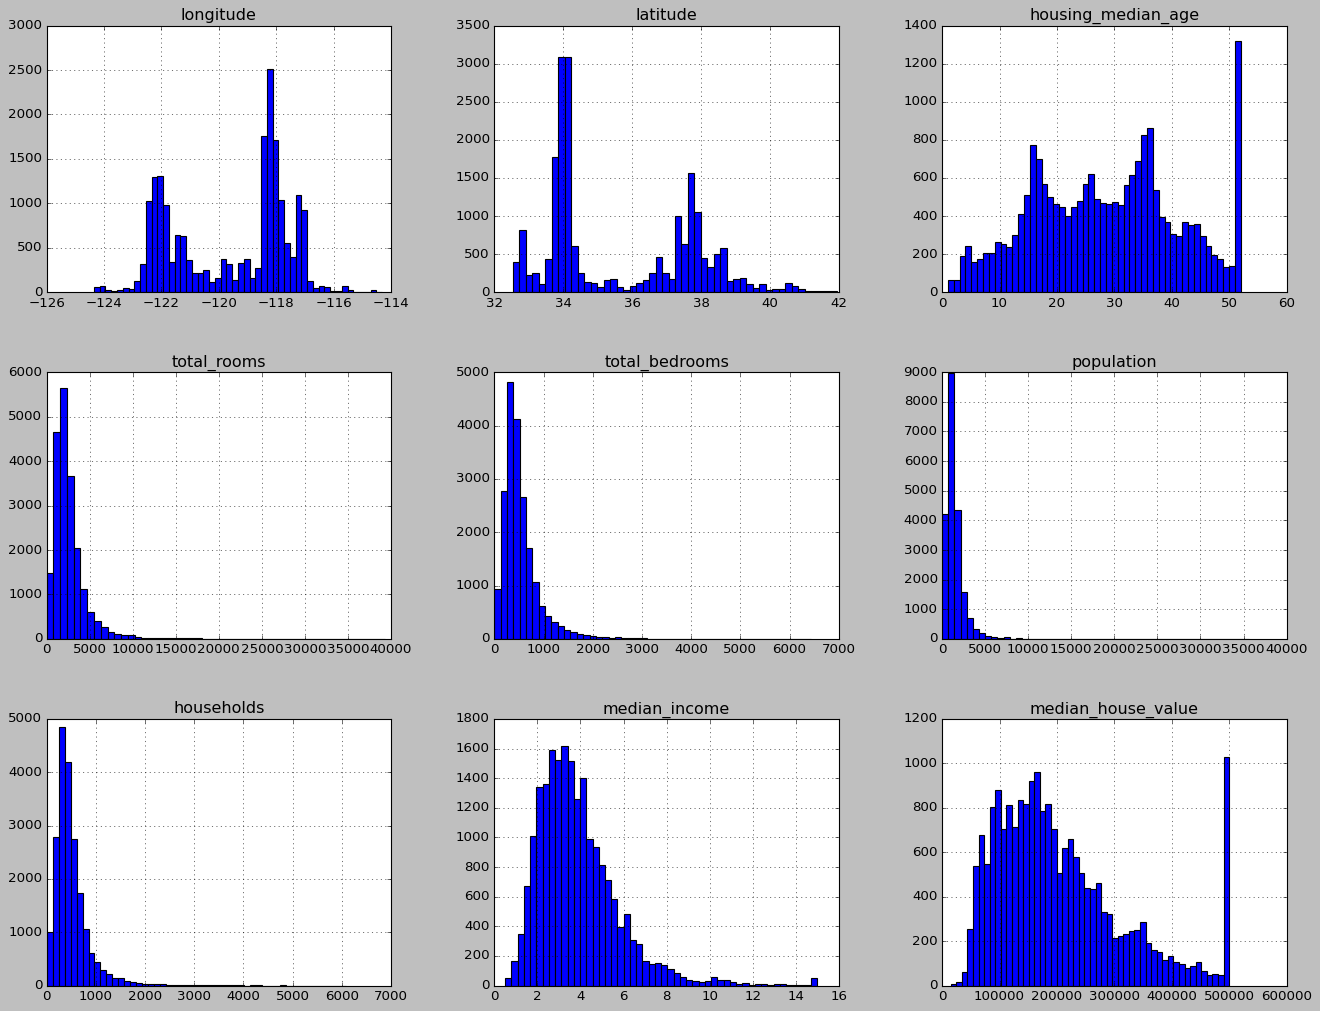

In [85]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, random_state=42, test_size=0.2)

<Axes: >

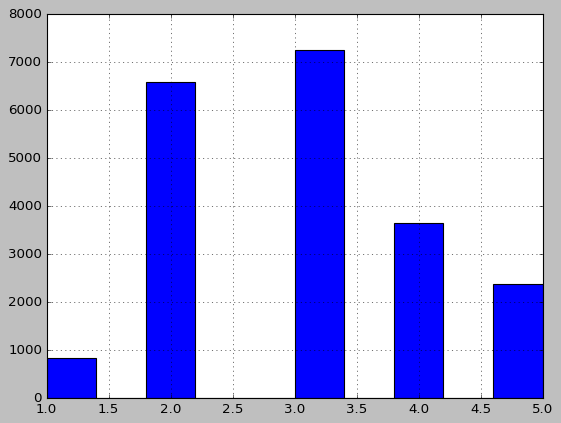

In [87]:
#2 계층별 샘플링

housing["income_cat"] = pd.cut(housing['median_income'], bins = [0, 1.5, 3., 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])
housing['income_cat'].hist()



In [88]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for 문을 하나만 도는데 for 문을 왜쓰는 걸까. 
for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

계층별 샘플링이 잘 이루어졌는지 확인

In [89]:
housing['income_cat'].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [90]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [91]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [92]:
# 계층별 샘플링이 적절하게 이루어졌으므로 income_cat feature 삭제

for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis=1, inplace=True)

In [138]:
#3 훈련 데이터가 손상되는일이 없도록 시각화를 위한 데이터 카피
housing = strat_train_set.copy()

/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1256: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

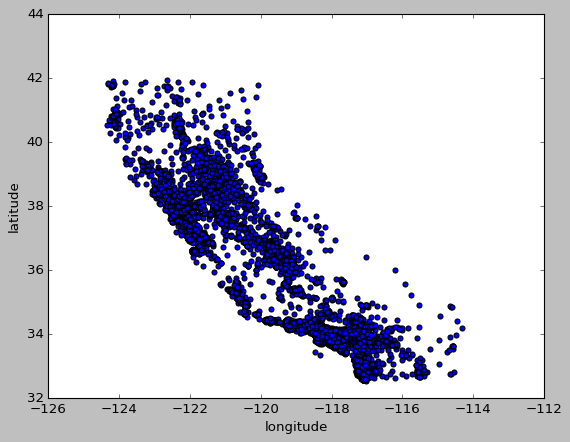

In [94]:
#산점도
housing.plot(kind="scatter", x='longitude', y='latitude')

/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1256: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

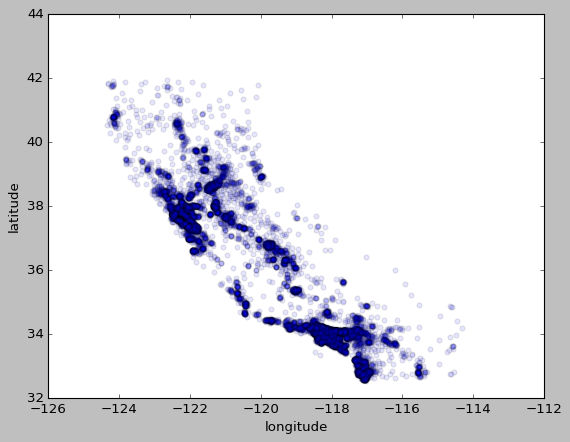

In [95]:
# 분포를 알기위해 투명도 조절
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

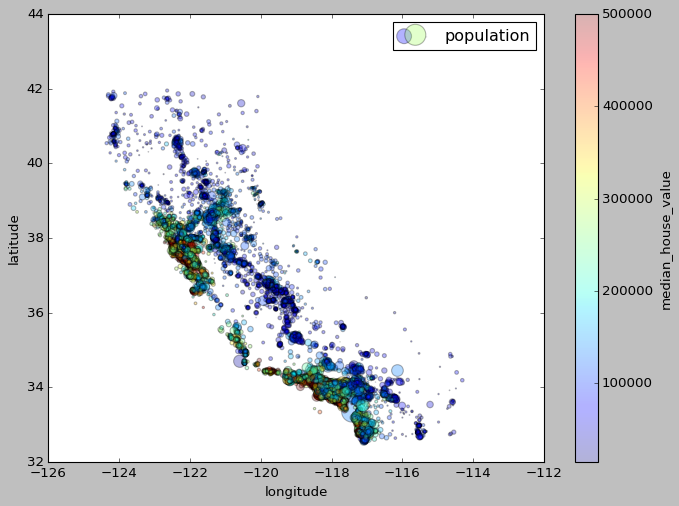

In [96]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
             s=housing["population"]/100, label='population', figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"))

In [97]:
# 상관관계 메트릭스 생성
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

In [98]:
# 주택 중간 가격과 다른 특성간의 상관관계 파악
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

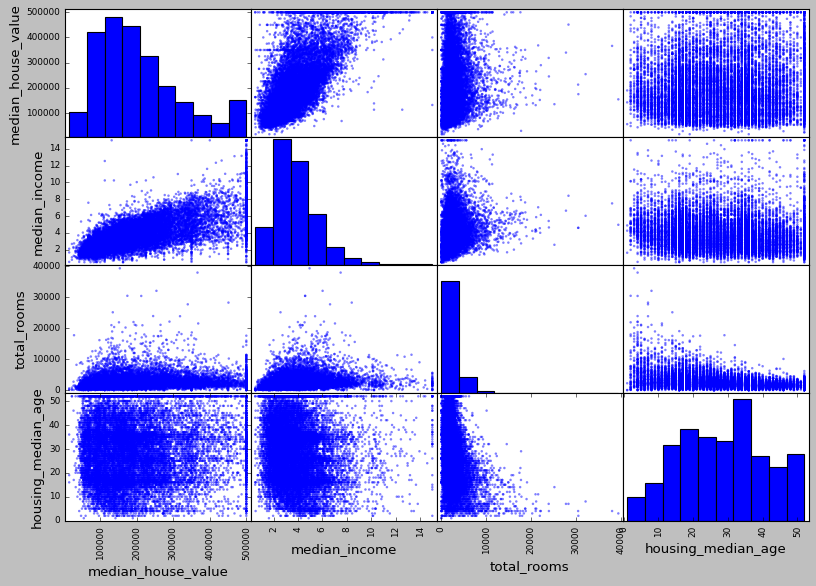

In [99]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

/Users/hosung/miniconda/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1256: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='median_income', ylabel='median_house_value'>

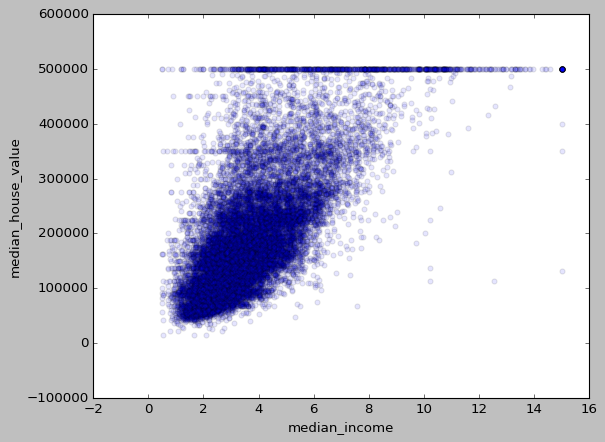

In [100]:
# 중간 주택 가격과 중간 소득 간의 연관관계 집중
housing.plot(kind="scatter", x='median_income', y='median_house_value', alpha=0.1)

In [101]:
# 특정 구역 방 개수보단 가구 당 방 개수가 더 유용한 특성일 것
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
# 전체 침실 개수 보단 한 방 개수당 침실 개수 더 유용한 특성일 것
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']

# 가구당 인원 수도 한번 구해보자
housing['population_per_household'] = housing['population'] / housing['households']

In [102]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [103]:
#4 머신러닝 알고리즘을 위한 데이터 준비

# feature 와 label 분류
housing = strat_train_set.drop("median_house_value", axis=1) # 새로운 객체
housing_labels = strat_train_set['median_house_value'].copy()

In [109]:
# null 값 확인
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [110]:
housing_labels.isnull().sum()

0

In [111]:
from sklearn.impute import SimpleImputer

# SimpleImputer 객체 생성
imputer = SimpleImputer(strategy="median")

In [115]:
# SimpleImputer 는 수치형 데이터만 계산할 수 있으므로 문자열 데이터인 "ocean_proximity" 는 날린다.
housing_num = housing.drop("ocean_proximity", axis=1)

In [117]:
# SimpleImputer 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [121]:
# SimpleImputer 가 중간값을 제대로 저장했는지 확인

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [124]:
# null 값을 중간값으로 교체 -> 결과값 : numpy array
X = imputer.transform(housing_num)

In [126]:
# numpy array 객체를 dataframe 객체로 전환
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [127]:
# null 값이 제대로 수정되었는지 확인
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [129]:
# 범주형 데이터 처리
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [131]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [134]:
# catagory 를 단순 숫자로 매핑
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [135]:
# 각 숫자에 매핑되는 카테고리 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [136]:
# 각각을 순서가 없는 하나의 범주로 매핑 - one-hot-encoding

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() 

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#sparce matrix 로 저장됌
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [137]:
# 매핑된 카테고리 확인
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [148]:
# 나만의 변환기 만들기

# BaseEstimator - get_params(), set_params() : 이는 pipeline 과 그리드 탐색에 사용되는 메서드이다.
# TransformerMixin - fit_transform 을 생성해준다.

from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3,4,5,6

# 일반적으로 변환기에는 np array 타입을 넣는다.
# index를 미리 알고 있어야하고 전처리 과정에서 index 가 의도한 것과 다를 수 있는 문제점이 발생할 수 있다는 것을 인지하자 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None) : # 더 할 일 x (값을 저장한 다음 transform 에 채워줘야 하는 작업이 필요하는 경우 사용)
        return self
    def transform(self, X) :
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]
            

In [149]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 2.1736, 72100.0, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 6.3373, 279600.0, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 2.875, 82700.0, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 3.1797, 140400.0, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 4.1964, 258100.0, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 3.1319, 62700.0, 'INLAND']],
      dtype=object)

In [150]:
# 내가 만든 변환기 테스트

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [156]:
# 새로운 특성 2개가 잘 들어갔는지 확인
print(housing.shape)
print(housing_extra_attribs.shape)

(16512, 10)
(16512, 12)


In [157]:
#5 특성 스케일링

# 변환 파이프 라인

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [161]:
# ColumnTransformer
# 칼럼별로 각각 다른 변환기를 적용시킬 수 있다. 또한 pipeline 과 다르게 DataFrame 과 잘 작동한다.

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # housing_num의 칼럼 리스트
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

# 테스트
housing_prepared = full_pipeline.fit_transform(housing)

array([[-0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 0.32286937,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.45702273,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.12169672,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])